<a href="https://colab.research.google.com/github/PrasadReddyGaddam/PYTHON/blob/master/06_07_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Problem Statement:

  - Detecting kyphosis disease at the early stage in children will prevent abnormal spinal vertebrae problems. The problem that we are going to solve here is that given a set of features that describe the absence or presence of kyphosis, our machine learning model must predict whether the kyphosis is present or absent. To train our machine learning model with kyphosis data, we will be using childen dataset Kyphosis

- INPUTS:

Age: in months<br>
Number: the number of vertebrae involved<br>
Start: the number of the first(topmost) vertebra operated on. <br>

- OUTPUT:

Kyphosis: a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation

In [1]:
## Importing Libraries:
import pandas as pd
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/kyphosis.csv")
data.head()


,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


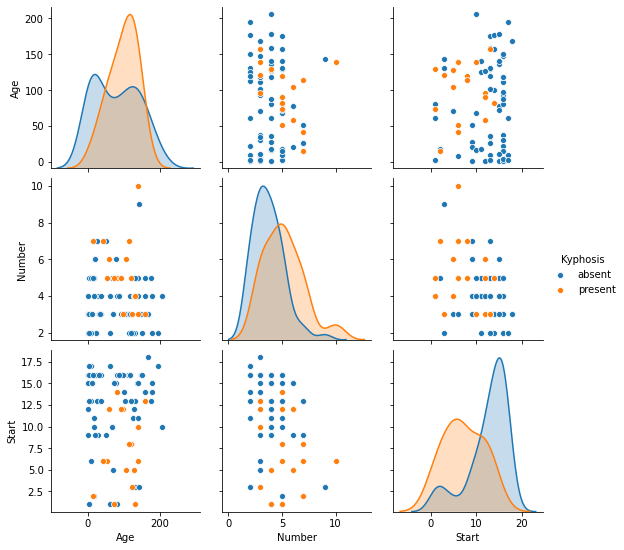

In [3]:
sns.pairplot(data, hue='Kyphosis')

In [4]:
# Splitting the data set into Input and Output

#X = data.iloc[:, 1:]
X= data.drop('Kyphosis', axis=1)
y= data.Kyphosis

In [5]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [6]:
# Apply the Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier

#initailization of object
dtree = DecisionTreeClassifier()

# Applying the classifier to the dataset
# syntax: objectname.fit(InputValues, OutputValues)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [7]:
# Predict on training data
y_train_pred = dtree.predict(X_train)
y_train_pred

array(['present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'present', 'absent',
       'present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'present', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'present'], dtype=object)

In [8]:
# Classification Report on training data
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

      absent       1.00      1.00      1.00        51
     present       1.00      1.00      1.00        13

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



In [9]:
confusion_matrix(y_train, y_train_pred)

array([[51,  0],
       [ 0, 13]])

In [10]:
# Prediction on test data(unseen data)
# Syntax: objectname.predict(InputValues)
y_test_pred =  dtree.predict(X_test)  #  corresponding output of X_test is stored in y_test
# Comapre the actual y_test values with model predicted y_test_pred values
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

      absent       0.73      0.85      0.79        13
     present       0.00      0.00      0.00         4

    accuracy                           0.65        17
   macro avg       0.37      0.42      0.39        17
weighted avg       0.56      0.65      0.60        17



In [11]:
print(confusion_matrix(y_test,y_test_pred))

[[11  2]
 [ 4  0]]


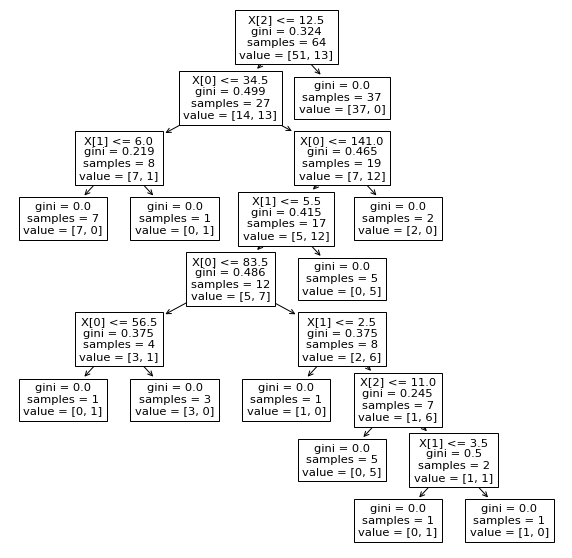

In [12]:
#Visualizing decision tree
from sklearn import tree
import matplotlib.pyplot as plt
#clf = tree.DecisionTreeClassifier(criterion="entropy")
plt.figure(figsize=(10,10))
tree.plot_tree(dtree)
plt.show()

In [13]:
#Kfold CV
from sklearn.model_selection import cross_val_score
cross_val_score(dtree,X_train,y_train,cv=4)
np.mean(scores)

NameError: ignored

**GridSearchCV**

In [ ]:
#Passing list of values  in a dictionary to find the optimum value for each parameter
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1)
    
}

In [ ]:
#Import the GridSearchCV 
from sklearn.model_selection import GridSearchCV

# initialization of GridSearch with the parameters- ModelName and the dictionary of parameters
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=clf, param_grid=grid_param)

# applying gridsearch onto dataset
grid_search.fit(X_train, y_train)

In [ ]:
# return the optimal parameters
grid_search.best_params_

In [ ]:
#Build the model with best parameters
#Initialized the DT Classifier
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 16, min_samples_leaf= 2)

# We need to fit the model to the data
clf.fit(X_train, y_train)

In [ ]:
# Prediction on test data
pred_test = clf.predict(X_test)

#Classification Report of actual values and predicted value(GridSearch)
print(classification_report(y_test, pred_test))

After applying GridSearch, we can say that our scores have been increased to some extent.

# Random Forest Classification

In [ ]:
# Import, initialize and fit

#Import the RFC from sklearn
from sklearn.ensemble import RandomForestClassifier

# initialize the object for RFC
rfc = RandomForestClassifier()

#fit the RFC to the dataset
rfc.fit(X_train, y_train)

In [ ]:
# Predictions on Training data
#SYnatx: objectname.predict(InputValues)
y_pred_train = rfc.predict(X_train)

from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_train, y_pred_train))

In [ ]:
# Prediction on test data(unseen data)
y_pred_test = rfc.predict(X_test)
print(classification_report(y_test, y_pred_test))

In [ ]:
#CrossValidationScore
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc, X_train, y_train, cv=5)
np.mean(scores)